In [191]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from lightkurve import search_targetpixelfile
from astropy.coordinates import SkyCoord
from astropy.units import Quantity
from astropy import units as u
from astropy.io import fits
from  astropy.timeseries import LombScargle

In [241]:
data=pd.read_csv("light_curve_eafe2ed7-6586-452d-a8a8-3f1b24b28dd6.csv")
data=data[data["Filter"]=="g"]
data=data[data["flux_err"]<1]
data=data[data["mag"].astype(float).values<13.50]
data=data[data["mag"].astype(float).values>12.7]

In [193]:
P=45.15345756

Text(0, 0.5, 'SDSS g [mag]')

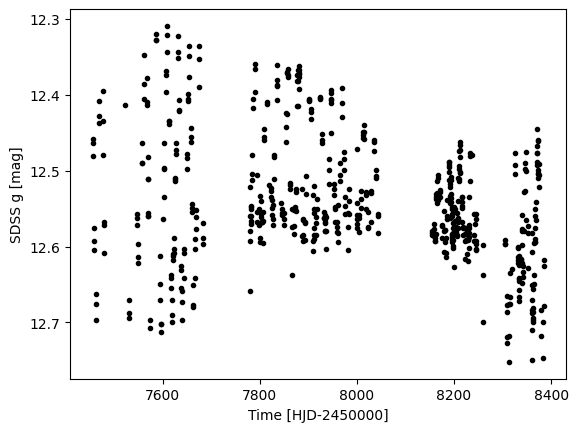

In [215]:
ax=plt.gca()
ax.scatter(data["HJD"].astype(float).values-2450000,data["mag"].astype(float).values,marker=".",color="black")
ax.invert_yaxis()
ax.set_xlabel("Time [HJD-2450000]")
ax.set_ylabel("SDSS g [mag]")

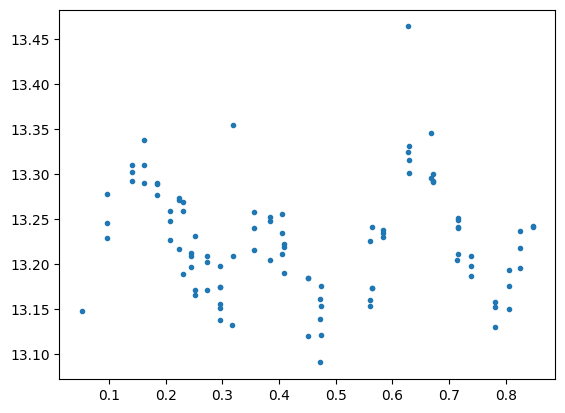

In [195]:
a=1000
N=100
plt.scatter(np.remainder(data["HJD"].astype(float).values[a:a+N]-2450000,P)/P,data["mag"].astype(float).values[a:a+N],marker=".")

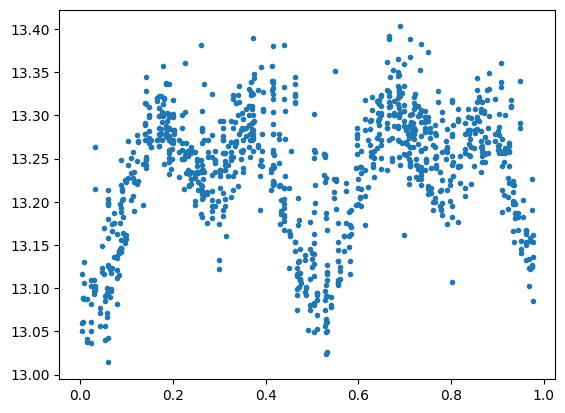

In [196]:
plt.scatter(np.remainder(data["HJD"].astype(float).values[-1000:]-2450000,P)/P,data["mag"].astype(float).values[-1000:],marker=".")

In [197]:
freq,power=LombScargle(data["HJD"].astype(float).values[-1000:],data["mag"].astype(float).values[-1000:]).autopower()

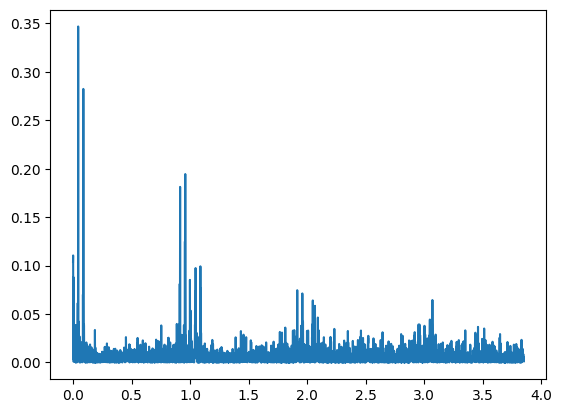

In [198]:
plt.plot(freq,power)

In [199]:
f_max=freq[np.argmax(power)]

In [200]:
1/f_max

22.625248780496783

In [ ]:
OGLE=np.loadtxt("GD1070.18.22288.dat",skiprows=1)
time_OGLE=OGLE[:,0]+2450000
data_V=pd.read_csv('ASASSN-V J170801.81-410255.6.csv')
np.max(data_V["hjd"])

2458384.56177

In [ ]:
np.min(time_OGLE)

2456497.54045

In [ ]:
np.max(time_OGLE)

2458734.50501

In [229]:
max_time=time_OGLE[-1]
min_time=time_OGLE[-12]

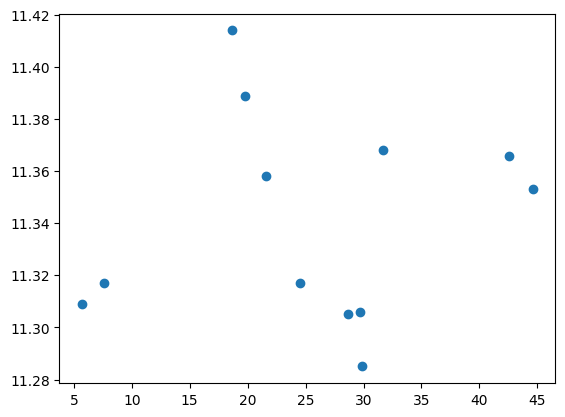

In [230]:
plt.scatter(np.remainder(time_OGLE[-12:],45),OGLE[-12:,1])

In [242]:
np.sum(np.logical_and(data["HJD"]<max_time,data["HJD"]>min_time))

502

In [243]:
np.min(data["HJD"])

2458282.76304

In [244]:
np.min(data_V["hjd"])

2457455.7928

In [245]:
min_time

2458549.78612

In [246]:
max_time-min_time

184.7188900001347

In [247]:
np.sum(data["HJD"]>min_time)

2334

In [248]:
id=np.logical_and(data["HJD"]<max_time,data["HJD"]>min_time)

(2458549.78612, 2458734.50501)

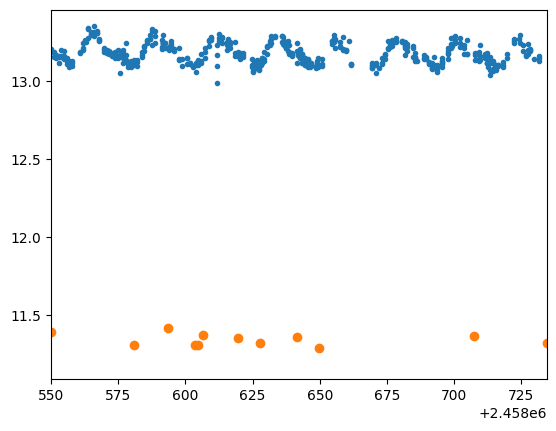

In [253]:
plt.scatter(data["HJD"][id].astype(float).values,data["mag"][id].astype(float).values,marker=".")
plt.scatter(time_OGLE,OGLE[:,1])
plt.xlim(min_time,max_time)